In [1]:
import groggy as gr
import json

<IPython.core.display.Javascript object>

In [2]:
# Streamlined API Meta-Graph Creation
# This replaces the complex 3-step process with a single focused extraction

import sys
sys.path.append('.')

# Import our streamlined extractor
from api_meta_graph_extractor import APIMetaGraphExtractor

# Create the extractor
extractor = APIMetaGraphExtractor()

# Extract the complete meta-graph
print("Starting API Meta-Graph extraction...")
meta_graph, summary = extractor.extract_complete_meta_graph()

print(f"\n🎉 Successfully created meta-graph!")
print(f"   Nodes (Types): {summary['meta_graph_stats']['nodes']}")
print(f"   Edges (Methods): {summary['meta_graph_stats']['edges']}")
print(f"   Types discovered: {summary['meta_graph_stats']['types_discovered']}")

# Show the graph structure
print(f"\nGraph object: {meta_graph}")
print(f"Node count: {meta_graph.node_count()}")
print(f"Edge count: {meta_graph.edge_count()}")

Starting API Meta-Graph extraction...
API Meta-Graph Extraction
Discovering Groggy API structure...
  Checking groggy module for available types...
    Found AggregationFunction class (could not instantiate)
    Found AggregationResult class (could not instantiate)
    Created AttrName instance
    Found AttrValue class (could not instantiate)
    Found AttributeFilter class (could not instantiate)
    Found BaseArray class (could not instantiate)
    Created BaseTable instance
    Found BranchInfo class (could not instantiate)
    Created BranchName instance
    Found Commit class (could not instantiate)
    Found ComponentsArray class (could not instantiate)
    Created DisplayConfig instance
    Found EdgeFilter class (could not instantiate)
    Created EdgeId instance
    Found EdgeNotFoundError class (could not instantiate)
    Found EdgesArray class (could not instantiate)
    Found EdgesTable class (could not instantiate)
    Found GraphMatrix class (could not instantiate)
    F

In [3]:
meta_graph.nodes.table()

NodesTable[34 x 8]

In [4]:
meta_graph.edges.table().column_names

['doc',
 'edge_id',
 'enhanced_signature',
 'is_property',
 'method_full_name',
 'name',
 'object_type',
 'parameter_types',
 'parameters_count',
 'relationship',
 'requires_parameters',
 'return_type',
 'signature',
 'source',
 'source_object',
 'source_type',
 'target']

In [5]:
meta_graph.edges.table()

EdgesTable[476 x 17]

In [6]:
meta_graph.edges.table()[['name', 'source_type', 'return_type']]

edge_id,source,target,name,source_type,return_type
236,9,20,nrows,NodesTable,float
355,29,29,has_meta_nodes,Subgraph,Subgraph
136,12,10,isalnum,BranchName,str
190,17,9,table,NodesAccessor,NodesTable
⋮,⋮,⋮,⋮,⋮,⋮
258,13,1,filter_by_targets,EdgesTable,Unknown
280,13,13,to_csv,EdgesTable,EdgesTable
217,5,23,verify_bundle,GraphTable,dict
232,9,16,into_base_table,NodesTable,BaseTable


In [7]:
meta_graph.edges[meta_graph.edges['source_type'] == 'GraphMatrix'].edges.table()[['name', 'source_type', 'return_type']]

edge_id,source,target,name,source_type,return_type
423,6,1,mean_axis,GraphMatrix,Unknown
413,6,8,inverse,GraphMatrix,Matrix
462,6,1,to_pandas,GraphMatrix,Unknown
437,6,8,requires_grad_,GraphMatrix,Matrix
⋮,⋮,⋮,⋮,⋮,⋮
432,6,8,preview,GraphMatrix,Matrix
441,6,1,set,GraphMatrix,Unknown
443,6,8,softmax,GraphMatrix,Matrix
431,6,21,power,GraphMatrix,int


In [8]:
# Access nodes table properly
try:
    nodes_table = meta_graph.nodes()
    print(f"Nodes table shape: {nodes_table.shape()}")
    print("\nFirst 5 type nodes:")
    nodes_table.head(5)
except Exception as e:
    print(f"Error accessing nodes: {e}")
    print("Showing discovered types from summary instead:")
    for i, type_name in enumerate(sorted(summary['discovery_data']['types'])[:5]):
        status = "Core" if type_name in summary['type_info'] else "Inferred"
        print(f"  {i+1}. {type_name} ({status})")

Error accessing nodes: 'builtins.NodesAccessor' object is not callable
Showing discovered types from summary instead:
  1. AttrName (Core)
  2. BaseArray (Inferred)
  3. BaseTable (Core)
  4. BranchName (Core)
  5. Commit (Inferred)


In [9]:
meta_graph.edges.group_by('source_object')[7].edges.table()

EdgesTable[36 x 17]

In [10]:
meta_graph.edges['source_object'].unique()

index,value
0,NodesTable
1,Subgraph
2,BranchName
3,NodesAccessor
⋮,⋮
17,StateId
18,NodeId
19,EdgeId
20,VizConfig


In [11]:
meta_graph.edges[meta_graph.edges['source_object'] == 'GraphTable'].edges.table()['return_type'].unique()

index,value
0,GraphTable
1,Unknown
2,dict
3,float
4,Graph
5,NodesAccessor
6,EdgesAccessor
7,SubgraphArray


In [12]:
meta_graph.edges[meta_graph.edges['source_object'] == 'NumArray'].edges.table()['return_type'].unique()

index,value
0,list
1,Unknown
2,float
3,NumArray


In [13]:
gr.array(meta_graph.edges[meta_graph.edges['source_object'] == 'NumArray'].nodes.ids())

index,value
0,32
1,20
2,0
3,1


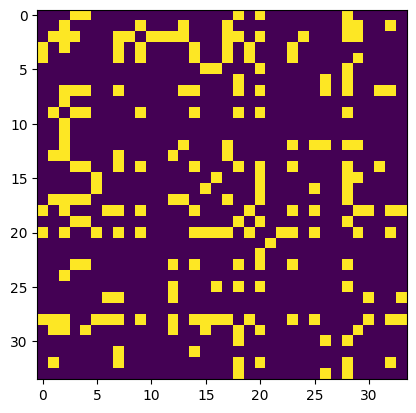

In [14]:
import matplotlib.pyplot as plt

plt.imshow(meta_graph.adj().data)

In [15]:
dir(meta_graph.viz())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_template',
 '_render_jupyter_widget',
 '_template',
 'data_source',
 'info',
 'render',
 'save',
 'serve',
 'supports_graph_view',
 'widget']

In [21]:
meta_graph.viz().widget()

GroggyGraphWidget(nodes=34, edges=476, layout=force-directed, theme=light)

In [17]:
meta_graph.viz().render(backend='file', filename='output.html')

📊 Generating static visualization...
   Output: output.html
   Format: html


In [18]:
meta_graph.viz().info()

{'total_rows': 34,
 'total_cols': 0,
 'supports_graph': True,
 'graph_info': {'node_count': 34,
  'edge_count': 476,
  'is_directed': False,
  'has_weights': False},
 'source_type': 'Graph'}